In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from scipy import stats
import numpy as np

In [2]:
assets = pd.read_csv('assets.csv')
assets['sensorId']=assets['sensors'].str.replace('[', '', regex=True).replace(']', '', regex=True).replace('"', '', regex=True)
assets

,_id,company,createdAt,description,model,modelType,name,sensors,specifications.axisX,specifications.axisY,specifications.axisZ,specifications.maxDowntime,specifications.maxTemp,specifications.power,specifications.rpm,specifications.workdays,sensorId
0,602fac7228aba1048d473cc4,5fb2c4eb1369a4325dc4545f,2021-02-19T12:17:54.457Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,"[""IAJ9206""]",vertical,horizontal,axial,48.00,NaN,3.7,1735.0,NaN,IAJ9206
1,5fd0e297bf7d581c1823b8e4,5fbbadeb82a6b901c26df618,2020-12-09T14:43:35.168Z,NaN,5fd0cf96bf7d581c1823b4c4,heaterFurnace,RDF-61.1,"[""LZY4270""]",axial,vertical,horizontal,0.25,55.0,0.0,1740.0,NaN,LZY4270
2,5fb286de1369a4325dc45433,5f6b83e34dd69d4bc799ea1f,2020-11-16T14:04:14.564Z,-,5fb275981369a4325dc4542e,transformer,TRANSFORMADOR 500 KVA N°1,"[""MUR8453""]",horizontal,vertical,NaN,NaN,65.0,NaN,NaN,NaN,MUR8453
3,6023fad9ed8ef30e9d30952b,5fb2c4eb1369a4325dc4545f,2021-02-10T15:25:13.265Z,NaN,6023f7dced8ef30e9d30945f,pump,Motor Bomba - Tanque de Expansão Tubo Verde,"[""MXK6435""]",horizontal,axial,vertical,48.00,NaN,7.0,3525.0,NaN,MXK6435
4,5ff71a150b6abb7be05083b0,5f17203f640a00cc08cb1b3d,2021-01-07T14:26:29.726Z,NaN,5ff5a854adacd8372cf06950,pump,CAG1- BAGS.12- Motor,"[""MYD8706""]",horizontal,axial,vertical,NaN,NaN,30.0,1765.0,NaN,MYD8706
5,5fd10441bf7d581c1823bf81,5fbbadeb82a6b901c26df618,2020-12-09T17:07:13.817Z,NaN,5fd10441bf7d581c1823bf80,heaterFurnace,VTF-61.1,"[""MYS2071""]",axial,radial,horizontal,0.25,60.0,1.5,894.0,[],MYS2071
6,5f92d9195676a32f97af5b65,5f8e02389950c66265569378,2020-10-23T13:22:33.577Z,-,604a3f1ba76ffc0ebb727d05,eletricMotor,Boko MA-1510 - Motor 2 da UH,"[""MZU6388""]",horizontal,vertical,radial,NaN,65.0,37.0,1750.0,"[0,1,2,3,4,5]",MZU6388
7,602fb8a228aba1048d474016,5fb2c4eb1369a4325dc4545f,2021-02-19T13:09:54.165Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador -GA75 FF - Prédio B104,"[""NAH4736""]",NaN,NaN,NaN,48.00,NaN,2.0,1080.0,NaN,NAH4736
8,5ff7346c0b6abb7be050876b,5f17203f640a00cc08cb1b3d,2021-01-07T16:18:52.234Z,NaN,5ff5a854adacd8372cf06950,pump,CAG1- BAGS.3- Motor,"[""NAI1549""]",axial,horizontal,vertical,NaN,NaN,75.0,1775.0,NaN,NAI1549
9,5f71d44967198d5d37e27d50,5f6b83e34dd69d4bc799ea1f,2020-09-28T12:17:13.295Z,Rotuladora Sidel,5f71d44867198d5d37e27d4f,other,ROTULADORA SIDEL,"[""NEW4797""]",NaN,NaN,NaN,1.00,70.0,NaN,1458.0,NaN,NEW4797


In [3]:
collects = pd.read_csv('collects.csv')
collects.head()

,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp
0,60b57955f77013684c413e39,2021-06-01T00:03:33.370Z,0.010463,0.004463,0.011677,3.006,1656.686627,1.622506e+09,0.000511,0.000176,0.000289,IAJ9206,23.94
1,60b57c53f77013684c41409f,2021-06-01T00:16:19.173Z,0.011437,0.004983,0.011482,3.006,1656.686627,1.622507e+09,0.000633,0.000238,0.000292,IAJ9206,23.19
2,60b57f34f77013684c4142cd,2021-06-01T00:28:36.553Z,0.010494,0.005024,0.011120,3.006,1656.686627,1.622507e+09,0.000524,0.000226,0.000246,IAJ9206,22.50
3,60b58237f77013684c41450c,2021-06-01T00:41:27.622Z,0.009859,0.004786,0.011096,3.006,1656.686627,1.622508e+09,0.000437,0.000220,0.000248,IAJ9206,22.87
4,60b58515f77013684c414765,2021-06-01T00:53:41.450Z,0.010014,0.005213,0.011332,3.006,1656.686627,1.622509e+09,0.000501,0.000251,0.000275,IAJ9206,22.56


In [4]:
pd.read_csv('collects.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33901 entries, 0 to 33900
Data columns (total 13 columns):
_id                  33901 non-null object
createdAt            33901 non-null object
params.accelRMS.x    33441 non-null float64
params.accelRMS.y    33441 non-null float64
params.accelRMS.z    33441 non-null float64
params.duration      33441 non-null float64
params.sampRate      33441 non-null float64
params.timeStart     33441 non-null float64
params.velRMS.x      33441 non-null float64
params.velRMS.y      33441 non-null float64
params.velRMS.z      33441 non-null float64
sensorId             33901 non-null object
temp                 33901 non-null float64
dtypes: float64(10), object(3)
memory usage: 3.4+ MB


In [5]:
def plot_graph(sensorId):
    collects_assets_merge=pd.merge(collects, assets, how='inner', on ='sensorId')
    collects_assets_merge=collects_assets_merge[collects_assets_merge['sensorId']==sensorId]
    pyplot.subplot(2, 1, 1)
    pyplot.plot(collects_assets_merge[['params.timeStart']],collects_assets_merge[['params.accelRMS.x']],label='accel-x')  
    pyplot.plot(collects_assets_merge[['params.timeStart']],collects_assets_merge[['params.accelRMS.y']],label='accel-y')  
    pyplot.plot(collects_assets_merge[['params.timeStart']],collects_assets_merge[['params.accelRMS.z']],label='accel-z')  
    pyplot.plot([], [], ' ', label=collects_assets_merge.sensorId.unique()) 
    pyplot.plot([], [], ' ', label=collects_assets_merge.name.unique()) 
    pyplot.plot([], [], ' ', label=collects_assets_merge.modelType.unique()) 
    pyplot.legend(loc="right",bbox_to_anchor=(2.2, 0.6))
    pyplot.subplot(2, 1, 2)
    pyplot.plot(collects_assets_merge[['params.timeStart']],collects_assets_merge[['params.velRMS.x']],label='vel-x')  
    pyplot.plot(collects_assets_merge[['params.timeStart']],collects_assets_merge[['params.velRMS.y']],label='vel-y')  
    pyplot.plot(collects_assets_merge[['params.timeStart']],collects_assets_merge[['params.velRMS.z']],label='vel-z')   
    pyplot.plot([], [], ' ', label=collects_assets_merge.sensorId.unique()) 
    pyplot.plot([], [], ' ', label=collects_assets_merge.name.unique()) 
    pyplot.plot([], [], ' ', label=collects_assets_merge.modelType.unique()) 
    pyplot.legend(loc="right",bbox_to_anchor=(2.2, 0.6))
    pyplot.figure(figsize=(14,20)) 
    pyplot.show()

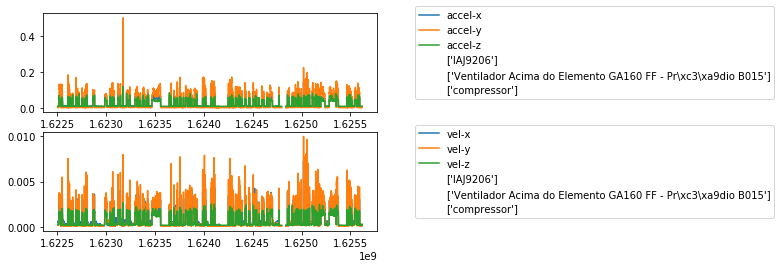

<Figure size 1008x1440 with 0 Axes>

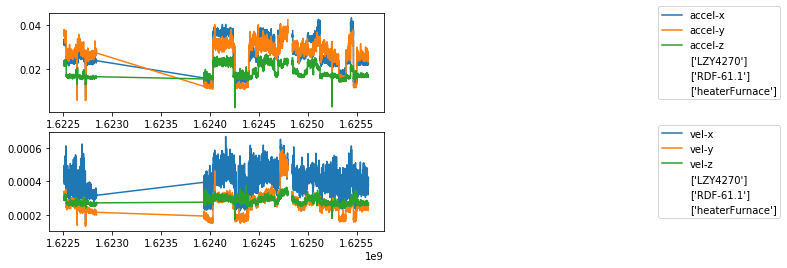

<Figure size 1008x1440 with 0 Axes>

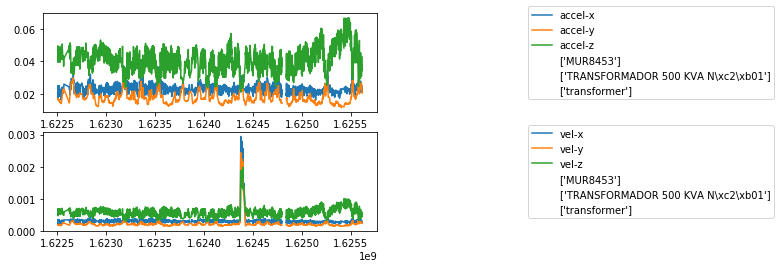

<Figure size 1008x1440 with 0 Axes>

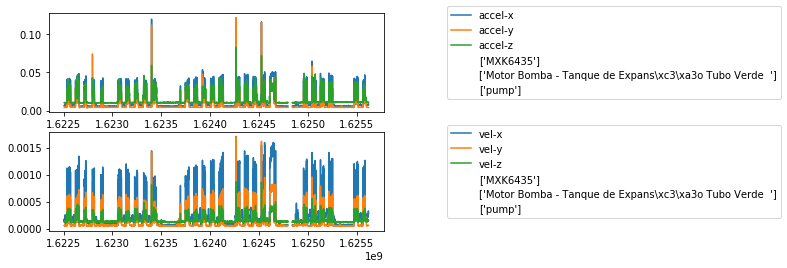

<Figure size 1008x1440 with 0 Axes>

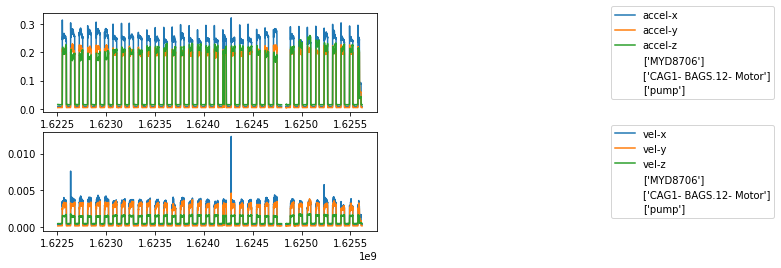

<Figure size 1008x1440 with 0 Axes>

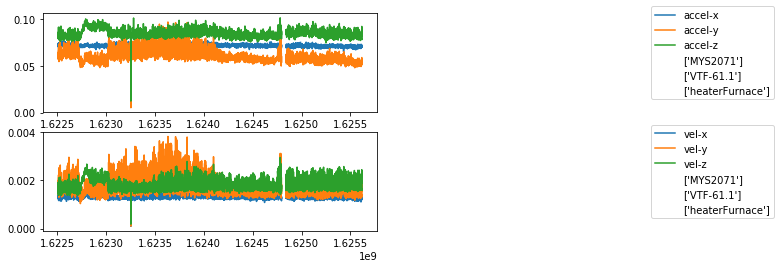

<Figure size 1008x1440 with 0 Axes>

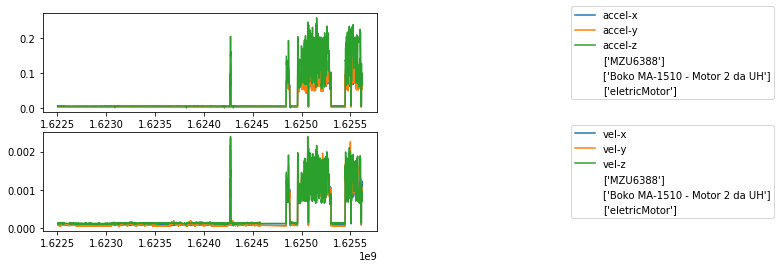

<Figure size 1008x1440 with 0 Axes>

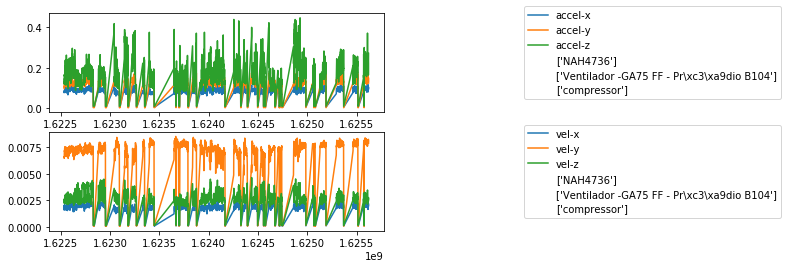

<Figure size 1008x1440 with 0 Axes>

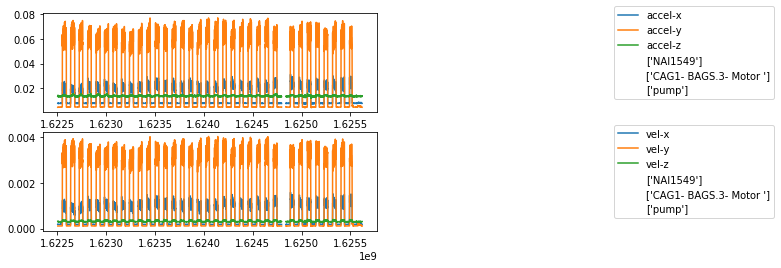

<Figure size 1008x1440 with 0 Axes>

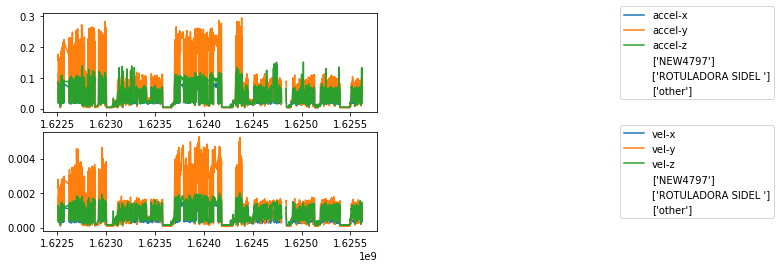

<Figure size 1008x1440 with 0 Axes>

In [6]:
for sensorId in collects.sensorId.unique():
     plot_graph(sensorId)

In [7]:
def uptime(sensorId):
    collects_sub=collects[collects['sensorId']==sensorId]
    max_reading =  pd.to_datetime(collects_sub['params.timeStart'].max(), unit='s')
    min_reading =  pd.to_datetime(collects_sub['params.timeStart'].min(), unit='s')
    total_time_sec = (max_reading-min_reading)/np.timedelta64(1,'s')
    uptime_sec=collects_sub["params.duration"].sum()
    downtime_sec=total_time_sec-uptime_sec
    print("uptime for %s is %f secs" % (sensorId,uptime_sec))
    print("downtime for %s is %f secs" % (sensorId,downtime_sec))
    print("-----------")

In [8]:
for sensorId in collects.sensorId.unique():
     uptime(sensorId)

uptime for IAJ9206 is 11801.590000 secs
downtime for IAJ9206 is 3102403.410000 secs
-----------
uptime for LZY4270 is 9005.005000 secs
downtime for LZY4270 is 3105070.995000 secs
-----------
uptime for MUR8453 is 9576.054000 secs
downtime for MUR8453 is 3099535.946000 secs
-----------
uptime for MXK6435 is 11440.836000 secs
downtime for MXK6435 is 3102496.164000 secs
-----------
uptime for MYD8706 is 12686.210000 secs
downtime for MYD8706 is 3101499.790000 secs
-----------
uptime for MYS2071 is 14296.538000 secs
downtime for MYS2071 is 3099809.462000 secs
-----------
uptime for MZU6388 is 11160.857000 secs
downtime for MZU6388 is 3103280.143000 secs
-----------
uptime for NAH4736 is 7103.303000 secs
downtime for NAH4736 is 3077642.697000 secs
-----------
uptime for NAI1549 is 12653.392000 secs
downtime for NAI1549 is 3101541.608000 secs
-----------
uptime for NEW4797 is 5993.659000 secs
downtime for NEW4797 is 3108210.341000 secs
-----------


In [9]:
collects['zscore'] = ( collects['params.velRMS.x'] - collects['params.velRMS.x'].mean() ) / collects['params.velRMS.x'].std()

In [10]:
def zscore_cal(sensorId):
    collects_sub = collects[collects['sensorId']==sensorId].copy()
    collects_sub['zscore_velX']=( collects_sub['params.velRMS.x'] - collects_sub['params.velRMS.x'].mean() ) / collects_sub['params.velRMS.x'].std()
    collects_sub['zscore_velY']=(collects_sub['params.velRMS.y']-collects_sub['params.velRMS.y'].mean())/collects_sub['params.velRMS.y'].std()
    collects_sub['zscore_velZ']=(collects_sub['params.velRMS.z']-collects_sub['params.velRMS.z'].mean())/collects_sub['params.velRMS.z'].std()
    collects_sub['zscore_accelX']=(collects_sub['params.accelRMS.x']-collects_sub['params.accelRMS.x'].mean())/collects_sub['params.accelRMS.x'].std()
    collects_sub['zscore_accelY']=(collects_sub['params.accelRMS.y']-collects_sub['params.accelRMS.y'].mean())/collects_sub['params.accelRMS.y'].std()
    collects_sub['zscore_accelZ']=(collects_sub['params.accelRMS.z']-collects_sub['params.accelRMS.z'].mean())/collects_sub['params.accelRMS.z'].std()
    return collects_sub

def check_variation(sensorId):
    collects_sub=zscore_cal(sensorId)
    print('X-Variation ')
    display(collects_sub.loc[(collects_sub['zscore_velX']>3) & (collects_sub['zscore_accelX']>3)])
    print('Y-Variation ')
    display(collects_sub.loc[(collects_sub['zscore_velY']>3) & (collects_sub['zscore_accelY']>3)])
    print('Z-Variation ')
    display(collects_sub.loc[(collects_sub['zscore_velZ']>3) & (collects_sub['zscore_accelZ']>3)])

def check_failure(sensorId):
    collects_sub=zscore_cal(sensorId)
    print("failure check for %s" % (sensorId))
    print("------------------")
    display(collects_sub.loc[(collects_sub['zscore_velX']>3) & (collects_sub['zscore_accelX']>3)
                             &(collects_sub['zscore_velY']>3) & (collects_sub['zscore_accelY']>3)
                             &(collects_sub['zscore_velZ']>3) & (collects_sub['zscore_accelZ']>3)])


In [11]:
check_variation('IAJ9206')

X-Variation 


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ
133,60b7081d32d4880e65349cb1,2021-06-02T04:25:01.131Z,0.090395,0.120141,0.063036,3.006,1656.686627,1.622608e+09,0.004394,0.005688,0.001715,IAJ9206,20.88,4.041268,3.488252,3.654642,2.064089,3.032024,2.425566,2.668402
136,60b710d132d4880e6534a236,2021-06-02T05:02:09.044Z,0.101411,0.184666,0.060157,3.006,1656.686627,1.622610e+09,0.004739,0.007539,0.001903,IAJ9206,21.69,4.431300,3.824388,5.055262,2.392268,3.516157,4.066276,2.490482
863,60bfa5d032d4880e653aace4,2021-06-08T17:16:00.232Z,0.140373,0.498345,0.119436,3.006,1656.686627,1.623173e+09,0.005051,0.007981,0.002675,IAJ9206,26.31,4.784025,4.128372,5.389715,3.739894,5.228463,12.042350,6.153875
1478,60c727b532d4880e653fc3c1,2021-06-14T09:56:05.213Z,0.100312,0.139477,0.068864,3.006,1656.686627,1.623665e+09,0.004820,0.006977,0.001854,IAJ9206,16.31,4.522873,3.903307,4.630006,2.306732,3.467858,2.917232,3.028567
1599,60c88dbc32d4880e6540b085,2021-06-15T11:23:40.031Z,0.108343,0.170810,0.061118,3.006,1656.686627,1.623756e+09,0.005430,0.007731,0.002136,IAJ9206,16.06,5.212496,4.497634,5.200545,2.798999,3.820805,3.713952,2.549871
1918,60cc5dead609da0e7531767f,2021-06-18T08:48:42.146Z,0.102934,0.163229,0.053675,3.006,1656.686627,1.624006e+09,0.005036,0.007913,0.002330,IAJ9206,24.37,4.767067,4.113757,5.338261,3.137652,3.583090,3.521186,2.089899
2046,60cde206d609da0e7532b367,2021-06-19T12:24:38.342Z,0.106450,0.150358,0.058751,3.006,1656.686627,1.624105e+09,0.005163,0.007650,0.002532,IAJ9206,15.38,4.910644,4.237494,5.139253,3.490269,3.737611,3.193909,2.403592
2259,60d0591cd609da0e75347418,2021-06-21T09:17:16.509Z,0.098876,0.153936,0.056599,3.006,1656.686627,1.624267e+09,0.004843,0.007540,0.001819,IAJ9206,16.94,4.548875,3.925716,5.056018,2.245635,3.404748,3.284889,2.270600
2261,60d05f02d609da0e753477e2,2021-06-21T09:42:26.772Z,0.094434,0.158351,0.063035,3.006,1656.686627,1.624269e+09,0.004551,0.007315,0.002080,IAJ9206,22.75,4.218761,3.641218,4.885765,2.701244,3.209531,3.397151,2.668340
2451,60d2ad44d609da0e7535e5d5,2021-06-23T03:40:52.453Z,0.091417,0.141706,0.054856,3.006,1656.686627,1.624420e+09,0.004430,0.006737,0.002084,IAJ9206,17.62,4.081967,3.523327,4.448402,2.708227,3.076939,2.973910,2.162884


Y-Variation 


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ
136,60b710d132d4880e6534a236,2021-06-02T05:02:09.044Z,0.101411,0.184666,0.060157,3.006,1656.686627,1.622610e+09,0.004739,0.007539,0.001903,IAJ9206,21.69,4.431300,3.824388,5.055262,2.392268,3.516157,4.066276,2.490482
863,60bfa5d032d4880e653aace4,2021-06-08T17:16:00.232Z,0.140373,0.498345,0.119436,3.006,1656.686627,1.623173e+09,0.005051,0.007981,0.002675,IAJ9206,26.31,4.784025,4.128372,5.389715,3.739894,5.228463,12.042350,6.153875
1599,60c88dbc32d4880e6540b085,2021-06-15T11:23:40.031Z,0.108343,0.170810,0.061118,3.006,1656.686627,1.623756e+09,0.005430,0.007731,0.002136,IAJ9206,16.06,5.212496,4.497634,5.200545,2.798999,3.820805,3.713952,2.549871
1600,60c890aa32d4880e6540b282,2021-06-15T11:36:10.808Z,0.087030,0.147427,0.065236,3.006,1656.686627,1.623757e+09,0.004098,0.006026,0.001655,IAJ9206,20.37,3.706631,3.199857,3.910401,1.959352,2.884139,3.119381,2.804360
1894,60cc178fd609da0e7531488f,2021-06-18T03:48:31.335Z,0.087338,0.168314,0.053885,3.006,1656.686627,1.623988e+09,0.003810,0.005987,0.001624,IAJ9206,20.44,3.381039,2.919257,3.880890,1.905237,2.897675,3.650485,2.102877
1896,60cc1d60d609da0e75314c57,2021-06-18T04:13:20.018Z,0.085493,0.151600,0.047482,3.006,1656.686627,1.623990e+09,0.003916,0.006309,0.001424,IAJ9206,23.62,3.500875,3.022533,4.124542,1.556111,2.816590,3.225490,1.707177
1906,60cc3aa2d609da0e75315f2d,2021-06-18T06:18:10.982Z,0.080983,0.160411,0.054957,3.006,1656.686627,1.623997e+09,0.003354,0.005117,0.001632,IAJ9206,21.75,2.865518,2.474973,3.222577,1.919202,2.618384,3.449532,2.169126
1908,60cc4082d609da0e75316307,2021-06-18T06:43:14.086Z,0.087151,0.172563,0.051624,3.006,1656.686627,1.623999e+09,0.003873,0.006144,0.001821,IAJ9206,24.00,3.452262,2.980638,3.999690,2.249126,2.889456,3.758527,1.963149
1918,60cc5dead609da0e7531767f,2021-06-18T08:48:42.146Z,0.102934,0.163229,0.053675,3.006,1656.686627,1.624006e+09,0.005036,0.007913,0.002330,IAJ9206,24.37,4.767067,4.113757,5.338261,3.137652,3.583090,3.521186,2.089899
2015,60cd83fed609da0e75325a27,2021-06-19T05:43:26.036Z,0.089627,0.152895,0.052047,3.006,1656.686627,1.624081e+09,0.004196,0.005391,0.001848,IAJ9206,25.44,3.817423,3.295339,3.429908,2.296258,2.998272,3.258419,1.989290


Z-Variation 


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ
863,60bfa5d032d4880e653aace4,2021-06-08T17:16:00.232Z,0.140373,0.498345,0.119436,3.006,1656.686627,1.623173e+09,0.005051,0.007981,0.002675,IAJ9206,26.31,4.784025,4.128372,5.389715,3.739894,5.228463,12.042350,6.153875
3329,60dd394d35645405b6298434,2021-07-01T03:41:01.414Z,0.060768,0.096282,0.083055,3.006,1656.686627,1.625111e+09,0.002250,0.002843,0.002360,IAJ9206,19.00,1.617414,1.399338,1.501881,3.190020,1.729973,1.818891,3.905559
3817,60e30a1e35645405b62d5f79,2021-07-05T13:33:18.912Z,0.058659,0.069733,0.069057,3.006,1656.686627,1.625492e+09,0.002765,0.003034,0.002272,IAJ9206,30.81,2.199636,1.901106,1.646407,3.036405,1.637287,1.143816,3.040494


In [12]:
for sensorId in collects.sensorId.unique():
     check_failure(sensorId)

failure check for IAJ9206
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ
863,60bfa5d032d4880e653aace4,2021-06-08T17:16:00.232Z,0.140373,0.498345,0.119436,3.006,1656.686627,1.623173e+09,0.005051,0.007981,0.002675,IAJ9206,26.31,4.784025,4.128372,5.389715,3.739894,5.228463,12.04235,6.153875


failure check for LZY4270
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ


failure check for MUR8453
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ


failure check for MXK6435
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ
10217,60c31efa32d4880e653d36fb,2021-06-11T08:29:46.968Z,0.119342,0.111577,0.059104,3.006,1656.686627,1.623400e+09,0.001439,0.001417,0.000812,MXK6435,16.37,0.700555,3.868734,7.631418,9.620646,9.791636,13.444642,6.379424
11300,60d04fa5d609da0e75346e08,2021-06-21T08:36:53.223Z,0.121035,0.120890,0.082667,3.006,1656.686627,1.624265e+09,0.001707,0.001701,0.000867,MXK6435,12.31,1.003537,4.730571,9.313036,10.434622,9.945411,14.656028,9.730581
11617,60d4465dd609da0e7536ebc4,2021-06-24T08:46:21.780Z,0.115834,0.115103,0.071992,3.006,1656.686627,1.624524e+09,0.001551,0.001617,0.000860,MXK6435,12.25,0.827175,4.228905,8.815656,10.331025,9.473006,13.903286,8.212370
11771,60d67ab8d609da0e75384ef2,2021-06-26T00:54:16.212Z,0.050678,0.044340,0.044224,3.006,1656.686627,1.624669e+09,0.001445,0.000815,0.000490,MXK6435,20.62,0.707338,3.888029,4.066863,4.855180,3.554906,4.698813,4.263173
12238,60dc2b0035645405b628d58d,2021-06-30T08:27:44.677Z,0.064593,0.057658,0.045484,3.006,1656.686627,1.625042e+09,0.001409,0.000954,0.000555,MXK6435,7.81,0.666639,3.772259,4.889908,5.817153,4.818802,6.431148,4.442371


failure check for MYD8706
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ


failure check for MYS2071
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ


failure check for MZU6388
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ
24365,60dc7ef935645405b6290c65,2021-06-30T14:26:01.572Z,0.116422,0.144415,0.246621,4.003,832.125906,1.625063e+09,0.002000,0.001969,0.002399,MZU6388,34.94,1.334782,4.237799,3.552683,4.238013,3.083914,3.537854,3.724722
24815,60e327d335645405b62d7284,2021-07-05T15:40:03.398Z,0.114503,0.192162,0.223286,4.003,832.125906,1.625500e+09,0.001782,0.002259,0.002004,MZU6388,46.81,1.088327,3.702810,4.170168,3.423875,3.023172,4.885764,3.318772


failure check for NAH4736
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ


failure check for NAI1549
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ


failure check for NEW4797
------------------


,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp,zscore,zscore_velX,zscore_velY,zscore_velZ,zscore_accelX,zscore_accelY,zscore_accelZ
